<a href="https://colab.research.google.com/github/mals77703/dl-digits-recognition/blob/core/MNIST_Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu keras

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!unzip /Train_UQcUa52.zip

Archive:  /Train_UQcUa52.zip
replace Images/test/49000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [ ]:
!pwd

/content


In [ ]:
image_path = 'Images/train/'

In [ ]:
!pip install --upgrade keras
from keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm
import numpy as np

In [ ]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1),  color_mode='grayscale'))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')


100%|██████████| 49000/49000 [00:10<00:00, 4578.33it/s]


In [ ]:
y = df['label']

In [ ]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


**Exploratory Data Analysis**

4


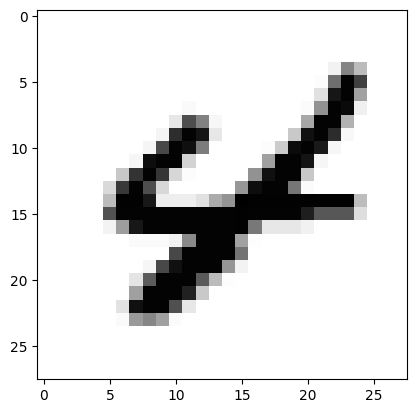

In [ ]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

2


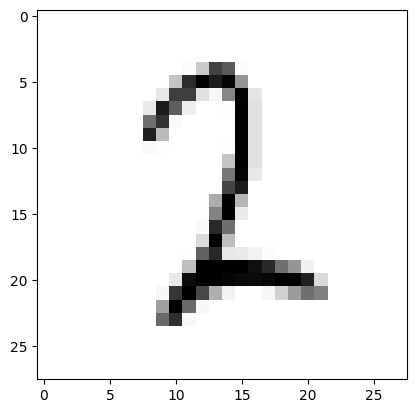

In [ ]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

7


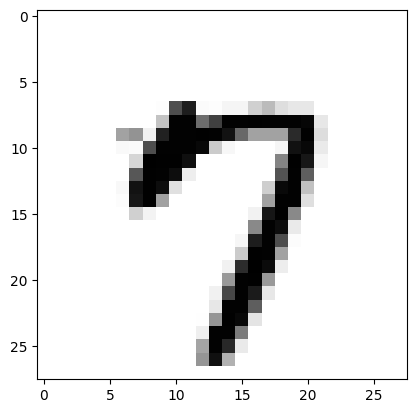

In [ ]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

**Normalization**

In [ ]:
#x_train[0]

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
#x_train[0]

**Model Creation**

In [ ]:
input_shape = (28,28,1)
output_class = 10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30


  0%|          | 0/49000 [06:22<?, ?it/s]


1149/1149 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8589 - loss: 0.4576 - val_accuracy: 0.9620 - val_loss: 0.1243
Epoch 2/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9628 - loss: 0.1246 - val_accuracy: 0.9751 - val_loss: 0.0814
Epoch 3/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9725 - loss: 0.0856 - val_accuracy: 0.9771 - val_loss: 0.0729
Epoch 4/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9825 - loss: 0.0578 - val_accuracy: 0.9767 - val_loss: 0.0758
Epoch 5/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9844 - loss: 0.0470 - val_accuracy: 0.9810 - val_loss: 0.0663
Epoch 6/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9881 - loss: 0.0367 - val_accuracy: 0.9812 - val_loss: 0.0668
Epoch 7/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0326 - val_accuracy: 0.9827 - val_loss: 0.0656
Epoch 8/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0288 - val_accura

**Testing the model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted output: 1


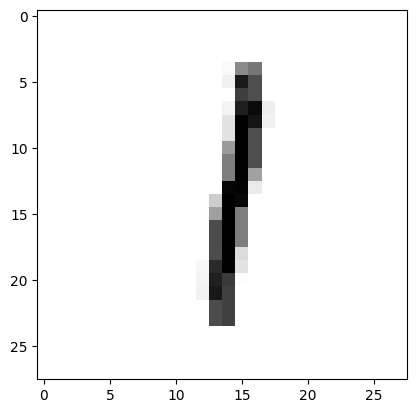

In [ ]:
image_index = 10
#print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted output: 8


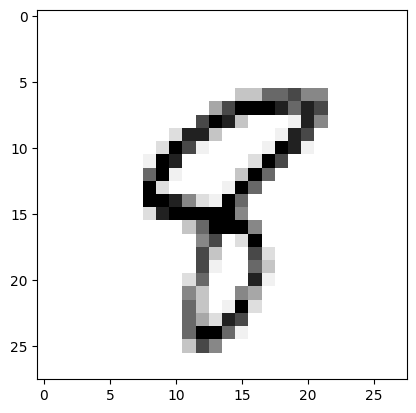

In [ ]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())